# An Introduction to Machine Learning with Scikit-learn

Machine Learning (ML) is a branch of artificial intelligence that allows computers to learn patterns from data and make predictions or decisions without being explicitly programmed. In this lecture, we will explore **key ML concepts** using **Scikit-learn**, a popular Python library for machine learning.

---

## ML Vocabulary (Sample, Features, Target)

* A **sample** (or observation) is a single data point.
* Each sample has multiple **features** (attributes) — measurable properties of the sample.
* **Target** — the value we want to predict in supervised tasks.

---

## Categories of Learning Problems

### Supervised Learning

Data includes both inputs (**features**) and known outputs (**targets**).

#### Classification

Predicting **discrete labels** (categories). Examples:

* Handwritten digit recognition (`digits` dataset)
* Email spam detection (spam / not spam)

#### Regression

Predicting **continuous values**. Examples:

* Predicting house prices (`california_housing` dataset)
* Estimating disease progression (`diabetes` dataset)

---

### Unsupervised Learning

Data **without labels**. Goal: find **structure** in the data.

#### Clustering

Grouping similar samples together.

#### Dimensionality Reduction

Reducing the number of features while retaining important information.

---

## Training, Validation and Testing Sets

* **Training set** – used to train the model.
* **Validation set** – used during training to tune hyperparameters, select model architecture, and prevent overfitting (guides decisions but does not directly update weights).
* **Testing set** – used for the final evaluation of the model’s generalization.

Standard workflow: split → fit on *training* → tune using *validation* → evaluate on *testing*

---

## Built-in Scikit-learn Datasets

Scikit-learn provides several [ready-to-use datasets](https://scikit-learn.org/stable/datasets.html):

| Dataset            | Type           | Task           | Features            | Target              |
| ------------------ | -------------- | -------------- | ------------------- | ------------------- |
| Iris               | Small, classic | Classification | Flower measurements | Species             |
| Digits             | Images (8×8)   | Classification | Pixel values        | Digit (0–9)         |
| Wine               | Chemical data  | Classification | 13 features         | Wine type           |
| Breast Cancer      | Medical        | Classification | 30 features         | Malignant / Benign  |
| Diabetes           | Medical        | Regression     | 10 features         | Disease progression |
| California Housing | Real-world     | Regression     | 8 features          | Median house price  |

**Note:** These datasets are great for experimentation and learning but are small and may not reflect real production-scale datasets.

### Example: Exploring Datasets

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

Each dataset is a **dictionary-like object** with:

* `.data` → feature matrix (n_samples, n_features)
* `.target` → labels / response values
* `.DESCR` → dataset description

---

### Example: Digits Dataset

Each digit is an 8×8 image stored as a flattened vector of 64 values.

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
no

<Figure size 640x480 with 0 Axes>

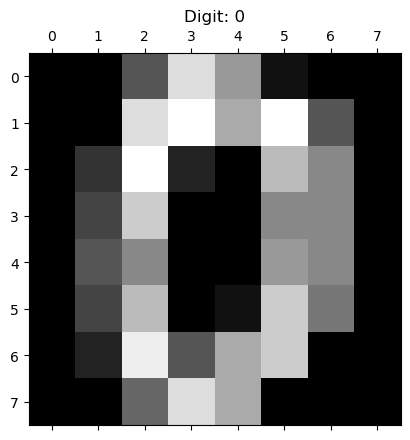

In [2]:
print(digits.data.shape)
print(digits.images[0])
print(digits.target[0])
print(digits.DESCR)

import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Digit: {digits.target[0]}")
plt.show()

### Example: Iris Dataset

Shows how petal and sepal sizes separate species.

* `iris_X` → features (petal length, petal width, sepal length, sepal width)
* `iris_y` → target labels (0=Setosa, 1=Versicolor, 2=Virginica)

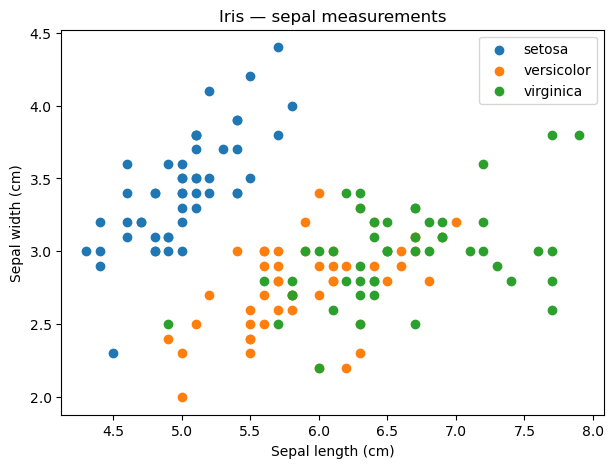

In [3]:
import pandas as pd 

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df.head()

plt.figure(figsize=(7,5))
for t, c, label in [(0, "blue", "setosa"),
                    (1, "green", "versicolor"),
                    (2, "red", "virginica")]:
    subset = iris_df[iris_df.target == t]
    plt.scatter(subset["sepal length (cm)"],
                subset["sepal width (cm)"],
                label=label)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.title("Iris — sepal measurements")
plt.show()

# Preprocessing Data

The `sklearn.preprocessing` module provides utilities and transformers to **prepare raw feature data** for machine learning. Preprocessing ensures that features are on a similar scale, improving learning performance and stability.

---

## Standardization

### Concept

Many models (e.g., linear models, SVMs with RBF kernels) **assume features are centered and have similar scales**.

Standardization is one of the most common preprocessing steps in machine learning.

It transforms each feature using the formula:

$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$

where:

* $\mu$ = mean of the feature,
* $\sigma$ = standard deviation of the feature.

After standardization:

* Every feature has **mean = 0**
* Every feature has **std = 1**

This helps many models that assume features are on comparable scales.

### Example: Standardization

Sure — here is the full explanation **in English**, including the standardization example and a clear answer to whether standardization “strongly modifies” the data.

In [1]:
from sklearn import preprocessing
import numpy as np

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

print("Means:", X_scaled.mean(axis=0))
print("Std devs:", X_scaled.std(axis=0))

Means: [0. 0. 0.]
Std devs: [1. 1. 1.]


In [5]:
scaler.inverse_transform(X_scaled)

array([[ 1.00000000e+00, -1.00000000e+00,  2.00000000e+00],
       [ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.11022302e-16,  1.00000000e+00, -1.00000000e+00]])

### Example: Standardization Results

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create synthetic dataset
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_informative=5,
    random_state=42
)

# Distort feature scales heavily
X[:, 0] *= 1e6
X[:, 1] *= 1e-6
X[:, 2] *= 1e9

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# KNN on raw (unscaled) data — performs poorly
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Results on raw data:", knn.score(X_test, y_test))

# KNN with StandardScaler — large improvement
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Evaluate the classifier on the scaled test data
print("Results with standardization:", knn.score(X_test_scaled, y_test))

Results on raw data: 0.54
Results with standardization: 0.894


> StandardScaler has parameters `with_mean` and `with_std` to disable centering or scaling.

---

## Scaling Features to a Range

### MinMaxScaler

Scales features to lie in a range `[0, 1]` (default).

**Formula:**
  $$
  x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$

In [7]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

X_test = np.array([[ 1.,     1., -1.],
                    [ 0.5,  0.,  0.],
                    [ 0.,    2., -1.]])

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

### MaxAbsScaler

Scales each feature by dividing by its **maximum absolute value**, mapping data to **[-1, 1]**.

**Formula:**
  $$
  x' = \frac{x}{|x_{\max}|}
  $$

In [8]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_test_maxabs = max_abs_scaler.transform(X_test)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

## Normalization

In scikit-learn, **normalization** means scaling **each sample (row)** so that its **vector norm = 1** according to a chosen norm (L1, L2, or max).
It does **not** operate column-wise (feature-wise) like MinMaxScaler or StandardScaler — normalization works **row-wise**.

### The three norms (L1, L2, max)

#### L2 normalization

Rescales each sample so that the **sum of squares = 1**.

$|x|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$

$x' = \frac{x}{|x|_2}$

**Intuition:** “You shrink or stretch each sample vector so its length becomes 1.”

---

#### L1 normalization

Rescales each sample so that the **sum of absolute values = 1**.

$|x|_1 = |x_1| + |x_2| + \dots + |x_n|$

$x' = \frac{x}{|x|_1}$

**Intuition:** “You scale the sample so all coordinates add up to 1.”

---

#### Max normalization

Rescales each sample so that the **largest absolute value = 1**.

$|x|_{\max} = \max(|x_1|, ..., |x_n|)$

$x' = \frac{x}{|x|_{\max}}$

**Intuition:** “Divide the entire vector by its largest element — the biggest feature becomes 1, others fall between −1 and 1.”

In [9]:
from sklearn.preprocessing import normalize

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

normalize(X, norm='l2')

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# Supervised Learning

---

## The Problem Solved in Supervised Learning

**Supervised learning** aims to learn the relationship between:

* **X** — observed features (2D array of shape `(n_samples, n_features)`)
* **y** — target labels (1D array of length `n_samples`)

The goal is to predict **y** for new observations.

All supervised estimators implement:

```python
estimator.fit(X_train, y_train)        # Train the model
y_pred = estimator.predict(X_test)     # Predict labels for new data
```

---

## Vocabulary Reminder: Classification and Regression

* **Classification**: predicting **discrete labels**
  Example: Iris species (Setosa, Versicolor, Virginica)
* **Regression**: predicting **continuous values**
  Example: Predicting house prices

---

## Split Iris Dataset into Train and Test Sets

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
iris_X, iris_y = load_iris(return_X_y=True)

# Equivalent split: 20 samples → test set
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=20,       # number of samples, not a fraction
    random_state=0,     # same as np.random.seed(0)
    shuffle=True        # train_test_split shuffles by default, but we state it explicitly
)

print("Training set size:", iris_X_train.shape[0])
print("Testing set size:", iris_X_test.shape[0])

Training set size: 130
Testing set size: 20


## k-Nearest Neighbors Classifier

![KNN](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*ItVKiyx2F3ZU8zV5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Create classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier
knn.fit(iris_X_train, iris_y_train)

# Predict test labels
y_pred = knn.predict(iris_X_test)
print("Predictions:  ", y_pred)
print("Actual labels:", iris_y_test)

Predictions:   [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Actual labels: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]



* `n_neighbors=1` → predict label of **closest training point**
* Non-parametric method: no model assumptions, relies on distances

---

### Exploring Predictions

In [12]:
# Compare predicted vs actual
for i, (pred, true) in enumerate(zip(y_pred, iris_y_test)):
    print(f"Sample {i}: Predicted={pred}, Actual={true}")

Sample 0: Predicted=2, Actual=2
Sample 1: Predicted=1, Actual=1
Sample 2: Predicted=0, Actual=0
Sample 3: Predicted=2, Actual=2
Sample 4: Predicted=0, Actual=0
Sample 5: Predicted=2, Actual=2
Sample 6: Predicted=0, Actual=0
Sample 7: Predicted=1, Actual=1
Sample 8: Predicted=1, Actual=1
Sample 9: Predicted=1, Actual=1
Sample 10: Predicted=2, Actual=2
Sample 11: Predicted=1, Actual=1
Sample 12: Predicted=1, Actual=1
Sample 13: Predicted=1, Actual=1
Sample 14: Predicted=1, Actual=1
Sample 15: Predicted=0, Actual=0
Sample 16: Predicted=1, Actual=1
Sample 17: Predicted=1, Actual=1
Sample 18: Predicted=0, Actual=0
Sample 19: Predicted=0, Actual=0


## Evaluation Metrics for Supervised Classification

After training a classifier such as KNN, we can evaluate its performance using several common metrics from `sklearn.metrics`.

![TPTN](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdtlNDz3d-zdYy5I4egYZ-0BwL4Am1bqKCWA&s)

### Accuracy

It measures overall proportion of correct predictions.

$\text{Accuracy}= \frac{\text{correct classifications}}{\text{total classifications}}= \frac{TP + TN}{TP + TN + FP + FN}$

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(iris_y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Balanced Accuracy

It measures average recall across all classes.
Useful when classes are imbalanced (not critical for Iris but pedagogically useful).

In [14]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(iris_y_test, y_pred)
print("Balanced accuracy:", balanced_acc)

Balanced accuracy: 1.0


### Classification Report (Precision, Recall, F1-score)

For each class it shows:

**precision** (How reliable are predictions for this class?) $\text{Precision}= \frac{\text{correct positive predictions}}{\text{all positive predictions}}= \frac{TP}{TP + FP}$

**recall** (How many of the true cases were found?) $\text{Recall}= \frac{\text{correctly identified positives}}{\text{all actual positives}}= \frac{TP}{TP + FN}$

**F1-score** (Balance between precision and recall) $= \text{harmonic mean of precision and recall}= \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

In [15]:
from sklearn.metrics import classification_report

print("\nClassification report:")
print(classification_report(iris_y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Confusion Matrix

It shows where the model makes mistakes: rows = true labels, columns = predicted labels.

In [16]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
print(confusion_matrix(iris_y_test, y_pred))

Confusion matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  4]]


## Linear Models

### Linear Regression

Linear regression models the relationship between features (X) and a continuous target (y) using a straight-line approximation.
The idea is simple: find the line (or hyperplane) that best fits the data by minimizing the discrepancy between predictions and true values.

$y \approx X \beta + \epsilon$

![LinearReg](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7-zYGfe_oTIT0qh0JAjon133lFBnyaMzExg&s)

#### **Example: Linear Regression**

Mean Squared Error: 2850.2435792863403
Mean Absolute Error: 41.20261248523317


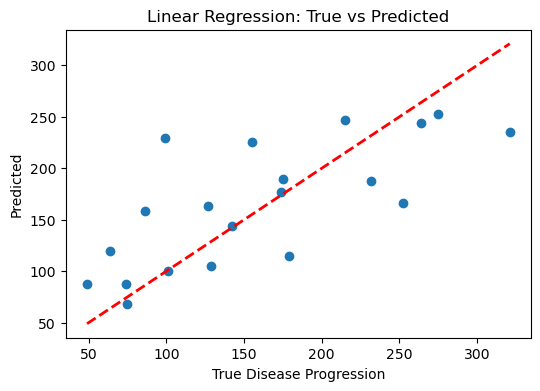

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load Diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Split into train/test (20 samples for testing)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=20,
    random_state=0
)

# Fit linear regression
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# Predict on test set
y_pred = regr.predict(diabetes_X_test)

# Metrics from sklearn
mse = mean_squared_error(diabetes_y_test, y_pred)
mae = mean_absolute_error(diabetes_y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot true vs predicted
plt.figure(figsize=(6,4))
plt.scatter(diabetes_y_test, y_pred)
plt.plot([diabetes_y_test.min(), diabetes_y_test.max()],
         [diabetes_y_test.min(), diabetes_y_test.max()],
         'r--', lw=2)
plt.xlabel("True Disease Progression")
plt.ylabel("Predicted")
plt.title("Linear Regression: True vs Predicted")
plt.show()


### Ridge Regression (L2 Regularization)

**Goal:** Reduce overfitting by **shrinking coefficients**.

$
\min_{w} ; \left(\sum_{i=1}^{n} (y_i - \hat{y}i)^2;+;\alpha \sum{j=1}^{p} w_j^2\right)
$

* `alpha` controls regularization strength

#### Example: Ridge Regression

Mean Squared Error: 3109.166585017254
Mean Absolute Error: 44.385913736254366


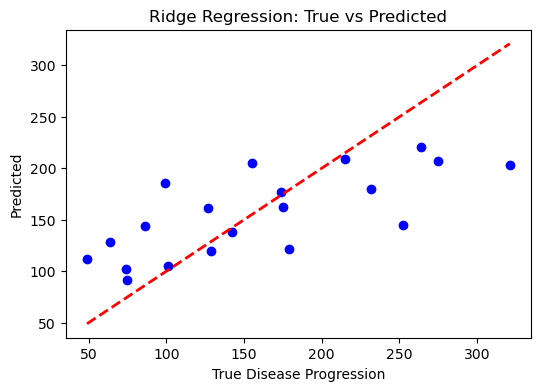

In [ ]:
# Fit Ridge regression (regularized linear regression)
ridge = linear_model.Ridge(alpha=1.0)   # alpha controls regularization strength
ridge.fit(diabetes_X_train, diabetes_y_train)

# Predict on test set
y_pred = ridge.predict(diabetes_X_test)

# Metrics from sklearn
mse = mean_squared_error(diabetes_y_test, y_pred)
mae = mean_absolute_error(diabetes_y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot true vs predicted
plt.figure(figsize=(6,4))
plt.scatter(diabetes_y_test, y_pred)
plt.plot([diabetes_y_test.min(), diabetes_y_test.max()],
         [diabetes_y_test.min(), diabetes_y_test.max()],
         'r--', lw=2)
plt.xlabel("True Disease Progression")
plt.ylabel("Predicted")
plt.title("Ridge Regression: True vs Predicted")
plt.show()

### Lasso Regression

**Goal:** Select important features by setting some coefficients to zero.

$
\min_{w} ; \left(\sum_{i=1}^{n} (y_i - \hat{y}i)^2;+;\alpha \sum{j=1}^{p} |w_j|\right)
$

#### Example: Lasso Regression

Mean Squared Error: 3425.912459116059
Mean Absolute Error: 46.0940491143561


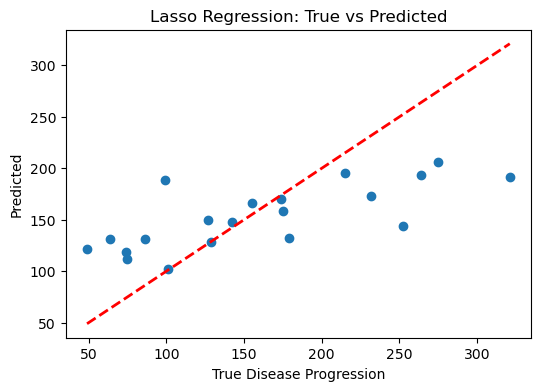

In [42]:
# Fit Lasso regression (L1 regularization)
lasso = linear_model.Lasso(alpha=1.0)   # alpha controls regularization strength
lasso.fit(diabetes_X_train, diabetes_y_train)

# Predict on test set
y_pred = lasso.predict(diabetes_X_test)

# Metrics from sklearn
mse = mean_squared_error(diabetes_y_test, y_pred)
mae = mean_absolute_error(diabetes_y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot true vs predicted
plt.figure(figsize=(6,4))
plt.scatter(diabetes_y_test, y_pred)
plt.plot([diabetes_y_test.min(), diabetes_y_test.max()],
         [diabetes_y_test.min(), diabetes_y_test.max()],
         'r--', lw=2)
plt.xlabel("True Disease Progression")
plt.ylabel("Predicted")
plt.title("Lasso Regression: True vs Predicted")
plt.show()


### Logistic Regression

**Goal:** Predict discrete labels using a **sigmoid function** for probabilities.

$
P(y=1 \mid X) = \frac{1}{1 + e^{-(X \cdot \beta)}}
$

* Multiclass handled via **one-vs-rest** internally
* `C` controls inverse regularization: large `C` → less regularization

#### Example: Logistic Regression

Predictions: [2 2 1 2 2 2 1 2 1 1]
True labels: [2 2 2 2 2 2 2 2 2 2]


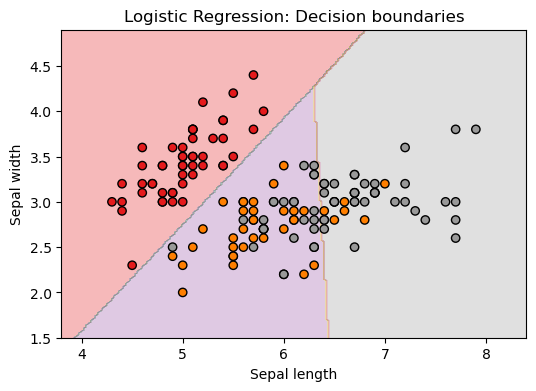

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load Iris
iris_X, iris_y = load_iris(return_X_y=True)

# Use only first two features for 2D plotting
X = iris_X[:, :2]
y = iris_y

# Train-test split
X_train, X_test = X[:-10], X[-10:]
y_train, y_test = y[:-10], y[-10:]

# Fit logistic regression
log = LogisticRegression(C=1e5, max_iter=1000)
log.fit(X_train, y_train)

# Predict test labels
y_pred = log.predict(X_test)
print("Predictions:", y_pred)
print("True labels:", y_test)

# Create grid for contour plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Logistic Regression: Decision boundaries")
plt.show()

## Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are part of the **discriminant model family**. They try to find a hyperplane that **maximizes the margin** between two classes. SVMs can be used for **classification** (`SVC`) and **regression** (`SVR`).

![SVM](https://towardsdatascience.com/wp-content/uploads/2023/10/1bXlp7LVAPhIay-Pk0MxdlA.png)

### Key SVM Parameters: `C` and `gamma`

* **`C`** — regularization strength:

  * **Small C** → margin considers many points → **more regularization**
  * **Large C** → margin considers only points close to the boundary → **less regularization**

![smallC](https://www.baeldung.com/wp-content/uploads/sites/4/2023/06/C_3.png)

![bigC](https://www.baeldung.com/wp-content/uploads/sites/4/2023/06/Large_C.png)

* **`gamma`** — defines influence range of a single training point:

  * **high gamma** → small, local influence (complex boundaries, sensitive to noise),
  * **low gamma** → larger influence (smoother decision regions).
  
![Gamma](https://media.geeksforgeeks.org/wp-content/uploads/20240602234527/1.jpg)

---

### Linear SVMs

**Key idea:** Find a plane (or line in 2D) that maximizes the distance between the closest points of two classes (the **support vectors**).

**Example using Iris dataset:**

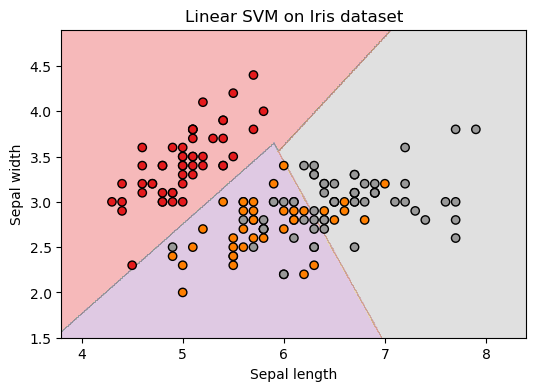

In [22]:
from sklearn import svm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and use first two features for visualization
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Train linear SVM
svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X, y)

# Create grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Linear SVM on Iris dataset")
plt.show()

**Note:** For SVMs, it is important to **normalize features** to unit standard deviation for better performance.

---

### Using Kernels

Some datasets are **not linearly separable**. SVMs can map data into higher-dimensional space using the **kernel trick**. Common kernels:

#### Linear Kernel

In [23]:
svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X, y)

SVC(kernel='linear')

* Same as standard linear SVM

---

#### Polynomial Kernel

In [24]:
svc = svm.SVC(kernel='poly', degree=3, C=1.0)
svc.fit(X, y)

SVC(kernel='poly')

* `degree` = polynomial degree
* Decision boundary is now **non-linear**

---

### RBF (Radial Basis Function) Kernel

In [25]:
svc = svm.SVC(kernel='rbf', gamma=0.5, C=1.0)
svc.fit(X, y)

SVC(gamma=0.5)

* `gamma` = inverse of the size of the radial kernel
* Smaller `gamma` → smoother decision boundary
* Larger `gamma` → tighter fit around points

---

#### Sigmoid Kernel

In [26]:
svc = svm.SVC(kernel='sigmoid', C=1.0)
svc.fit(X, y)

SVC(kernel='sigmoid')

* Decision function resembles a **neural network activation function**
* Less common, but can work for some problems

---

### Visualizing Kernels

Here’s an example showing the **effect of different kernels** on the Iris dataset:

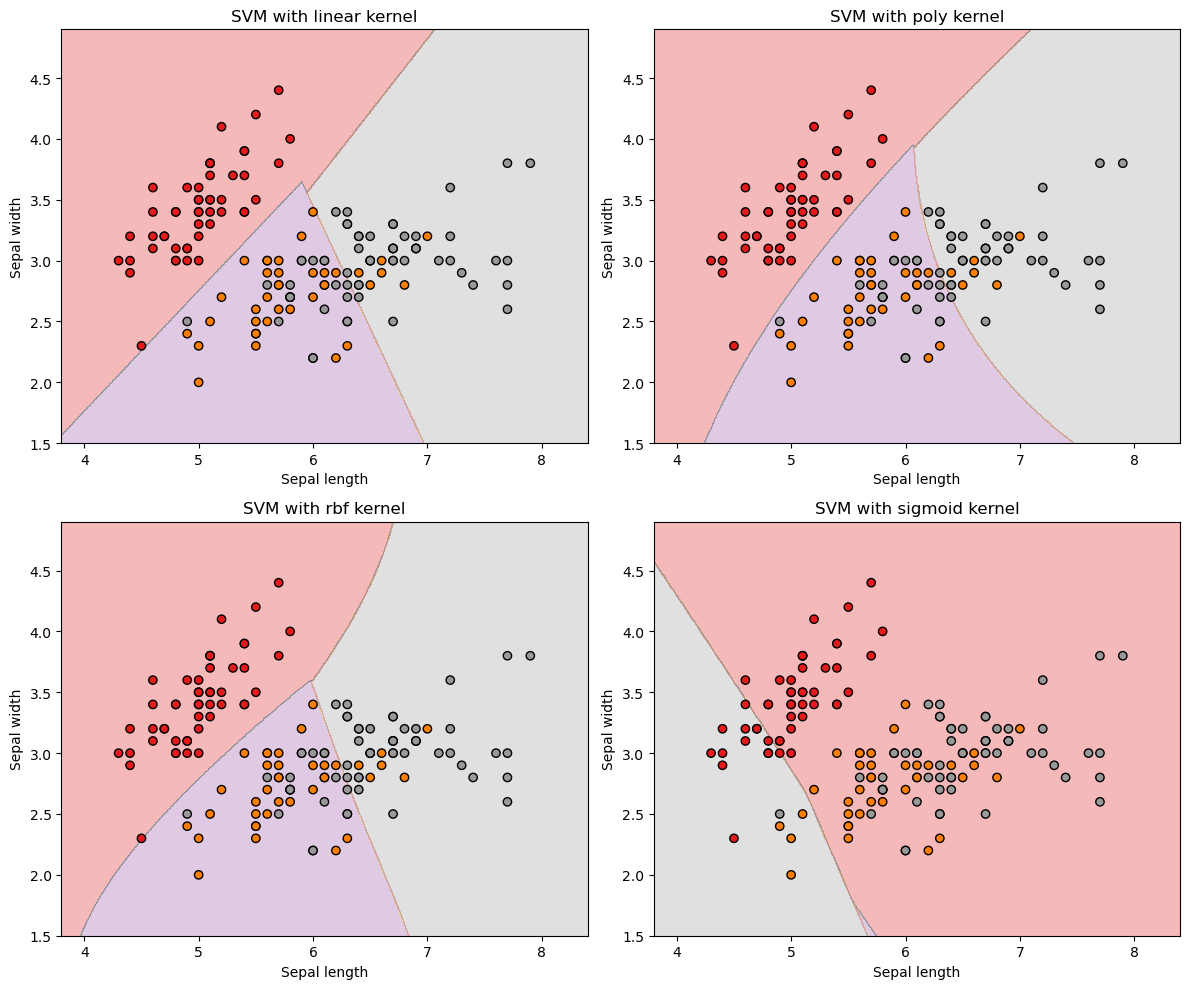

In [27]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(12,10))

for i, kernel in enumerate(kernels):
    svc = svm.SVC(kernel=kernel, degree=3 if kernel=='poly' else 0, gamma=0.5 if kernel=='rbf' else 'scale', C=1.0)
    svc.fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.title(f"SVM with {kernel} kernel")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()

# Unsupervised Learning

In unsupervised learning, we **do not have labeled outputs**. The goal is to **find structure or patterns** in the data.

---

## Clustering: Grouping Observations

### The Problem

Suppose we have the **Iris dataset** and know there are 3 species of iris, but we do not have labels. **Clustering** attempts to group similar observations together.

---

### K-Means Clustering

K-Means is one of the simplest and most widely used clustering algorithms:

* Choose `k` cluster centers
* Assign each sample to the nearest center
* Recompute centers iteratively until convergence

Predicted labels: [1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
True labels:      [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


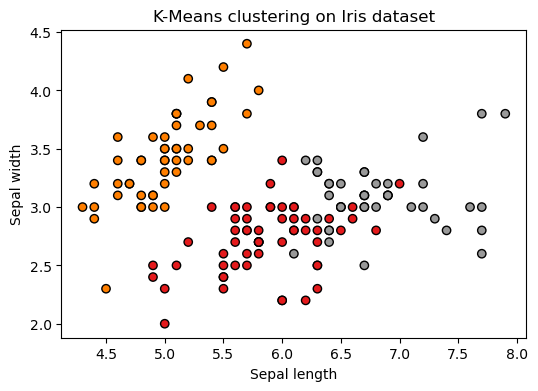

In [28]:
import numpy as np
from sklearn import datasets, cluster

# Load iris dataset
X_iris, y_iris = datasets.load_iris(return_X_y=True)
np.random.seed(1)

# K-Means clustering
k_means = cluster.KMeans(n_clusters=3, n_init=10)
k_means.fit(X_iris)

# Compare predicted labels to true labels
print("Predicted labels:", k_means.labels_[::10])
print("True labels:     ", y_iris[::10])

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=k_means.labels_, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("K-Means clustering on Iris dataset")
plt.show()

# Points colored by **predicted cluster**
# Compare visually to the true species

**Notes:**

* K-Means may **not recover ground truth labels** exactly.
* Sensitive to initialization → may get **local minima**.
* Choosing the right number of clusters is critical.

---

### Vector Quantization: Image Compression

K-Means can **compress data** by representing it with a small set of exemplars:

/var/folders/30/p871csfd59bg0hq53w_t9pw80000gn/T/ipykernel_2085/1421548143.py:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


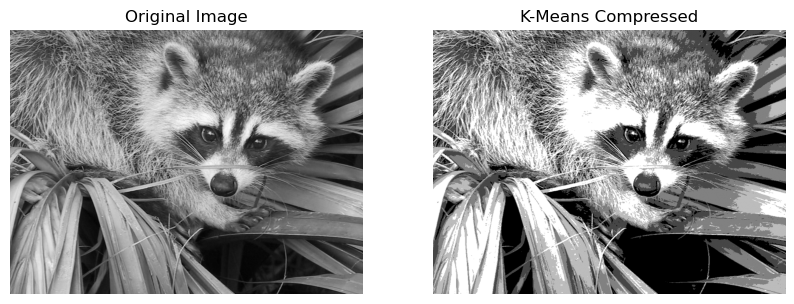

In [44]:
from sklearn import cluster
from scipy import misc
import numpy as np

# Load grayscale image
try:
    face = misc.face(gray=True)
except AttributeError:
    from skimage import data
    face = data.camera()

X = face.reshape((-1, 1))  # Flatten image

# K-Means quantization
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values).reshape(face.shape)

# Plot original and compressed
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(face, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(face_compressed, cmap='gray')
plt.title("K-Means Compressed")
plt.axis('off')
plt.show()

* Each pixel is **assigned to nearest cluster center**
* Reduces the number of gray levels → **posterized image**

---

### Feature Agglomeration

We can **cluster features instead of samples** to reduce dimensionality:

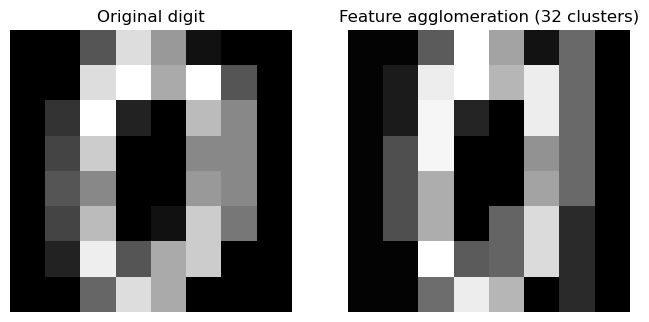

In [30]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.datasets import load_digits
from sklearn.feature_extraction import grid_to_graph
import numpy as np
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
images = digits.images
X = images.reshape(len(images), -1)
connectivity = grid_to_graph(*images[0].shape)

# Feature agglomeration
agglo = FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = X_approx.reshape(images.shape)

# Compare original and reduced images
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(images[0], cmap='gray')
plt.title("Original digit")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(images_approx[0], cmap='gray')
plt.title("Feature agglomeration (32 clusters)")
plt.axis('off')
plt.show()

## Principal Component Analysis (PCA)

PCA finds directions of **maximum variance** in the data. These directions form a **new orthogonal basis**.

![PCA](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aEzC_T8gjhUkqEuBPLFhAQ.png)

### Example: PCA

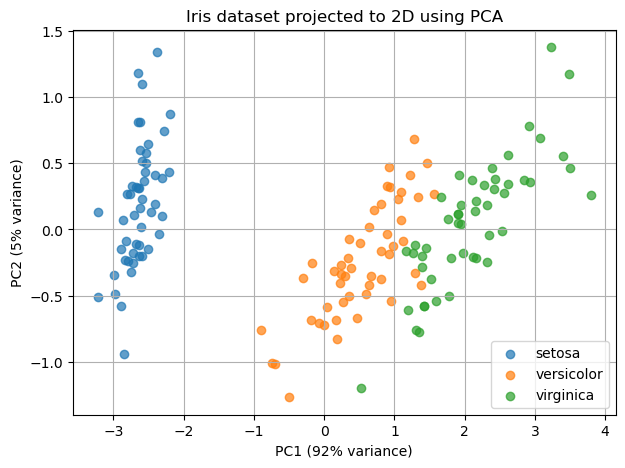

In [45]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data          # 4 features
y = iris.target        # class labels
target_names = iris.target_names

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(7,5))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                label=target_name, alpha=0.7)

plt.xlabel("PC1 ({}% variance)".format(round(pca.explained_variance_ratio_[0]*100)))
plt.ylabel("PC2 ({}% variance)".format(round(pca.explained_variance_ratio_[1]*100)))
plt.title("Iris dataset projected to 2D using PCA")
plt.legend()
plt.grid(True)
plt.show()


# Pipelines

In machine learning, we often need to **chain multiple operations** such as preprocessing, dimensionality reduction, and model fitting. Scikit-learn provides the **Pipeline** class to make this process convenient, safe, and reproducible.

---

## What is a Pipeline?

* A **Pipeline** is a sequence of estimators.
* **All steps except the last** must be **transformers** (implement `.transform()` method).
* The **last step** can be a transformer, predictor (classifier/regressor), or clustering estimator.
* The pipeline exposes the methods of the **last estimator**:

  * `.transform()` if the last estimator is a transformer
  * `.predict()` if the last estimator is a predictor

### Example: Creating a pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

### Example: Shortcut using `make_pipeline`

In [34]:
from sklearn.pipeline import make_pipeline
make_pipeline(PCA(), SVC())

Pipeline(steps=[('pca', PCA()), ('svc', SVC())])

## Accessing Steps in a Pipeline

Steps can be accessed via **indexing**, slicing, or `named_steps`.

In [35]:
# Slicing to get sub-pipeline
print(pipe[:1])  # Pipeline(steps=[('reduce_dim', PCA())])
print(pipe[-1:]) # Pipeline(steps=[('clf', SVC())])

# Access by index or name
print(pipe.steps[0])
print(pipe[0])             
print(pipe['reduce_dim'])

# named_steps allows tab completion
pipe.named_steps.reduce_dim is pipe['reduce_dim']  # True

Pipeline(steps=[('reduce_dim', PCA())])
Pipeline(steps=[('clf', SVC())])
('reduce_dim', PCA())
PCA()
PCA()


True

## Tracking Feature Names

Pipelines allow you to inspect **features after transformations**.

In [36]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

iris = load_iris()
print(iris.feature_names)

pipe = Pipeline(steps=[
    ('select', SelectKBest(k=2)),
    ('clf', LogisticRegression())
])
pipe.fit(iris.data, iris.target)

# Features after selection
print(pipe[:-1].get_feature_names_out())
# array(['x2', 'x3'], ...)

# Using custom input feature names
print(pipe[:-1].get_feature_names_out(iris.feature_names))
# array(['petal length (cm)', 'petal width (cm)'], ...)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['x2' 'x3']
['petal length (cm)' 'petal width (cm)']


## Accessing and Setting Nested Parameters

Parameters of steps can be set using the `step__parameter` syntax.

In [37]:
pipe = Pipeline(steps=[("reduce_dim", PCA()), ("clf", SVC())])
pipe.set_params(clf__C=10)

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC(C=10))])

## Caching Transformers

Fitting transformers can be **expensive**. The `memory` parameter caches the results of transformer `.fit()` to **avoid recomputation**.

In [38]:
from tempfile import mkdtemp
from shutil import rmtree

estimators = [('reduce_dim', PCA()), ('clf', SVC())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)
print(pipe)

# Clean up cache
rmtree(cachedir)

Pipeline(memory='/var/folders/30/p871csfd59bg0hq53w_t9pw80000gn/T/tmp4wg9wfj2',
         steps=[('reduce_dim', PCA()), ('clf', SVC())])


Inspecting transformers when caching is enabled:

In [39]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
pca2 = PCA()
svm2 = SVC()

cached_pipe = Pipeline([('reduce_dim', pca2), ('clf', svm2)], memory=cachedir)
cached_pipe.fit(X_digits, y_digits)

# Inspect fitted transformer
print(cached_pipe.named_steps['reduce_dim'].components_)
# Output: array([[...], [...], ...])
rmtree(cachedir)

[[ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 0.00000000e+00  1.01064569e-02  4.90849204e-02 ... -1.76697117e-01
  -1.94547053e-02  6.69693895e-03]
 [ 0.00000000e+00 -1.83420720e-02 -1.26475543e-01 ... -2.32084163e-01
  -1.67026563e-01 -3.48043832e-02]
 ...
 [-0.00000000e+00 -0.00000000e+00  1.09515776e-15 ...  7.59088852e-16
   5.63000682e-16 -1.37370812e-15]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00  2.85248196e-15 ...  1.06799983e-15
   1.30484658e-15 -4.20054207e-15]]


**Note:** With caching, the original transformer instance is cloned, so you must inspect the pipeline’s `named_steps`.

# Bonus: Choosing the right estimator

![RightRstimator](https://scikit-learn.org/1.3/_static/ml_map.png)